## 1. Importing libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
%matplotlib inline

In [5]:
#importing data
path = r'C:\Users\Admin\Documents\Data Analytics Course\Achievement 6\Texas School Nutrition Program Analysis\02 Data'
df = pd.read_csv(os.path.join(path,'Prepared Data', 'SchoolNutritionPrograms20-21_Clean.csv'), index_col=[0]) 

In [6]:
df.head()

,ReportType,CEID,CEName,TypeOfAgency,TypeOfOrg,ESC,TDARegion,SiteID,SiteName,COVIDMealSite,...,LunchServedPaid,SnackDays,BreakfastReimbursement,LunchReimbursement,SnackReimbursement,TotalReimbursement,TotalFreeRedcEligQty,Normalized_FreeRedcElig,Normalized_LunchADP,Normalized_LunchTotal
0,SCHOOLNUTRITIONPROGRAMCLAIMS,4,NECHES ISD,Educational Institution,Public,7,2,102,NECHES ELEMENTARY,NO,...,0,19,0.00,0.00,263.0,263.00,250,100.000000,0.000000,0.000000
1,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,1,PALESTINE H S,NO,...,930,0,6436.46,29107.95,0.0,35544.41,922,89.168279,59.291103,830.077369
2,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,41,PALESTINE MIDDLE,NO,...,554,14,3522.97,17362.51,45.0,20930.48,444,89.156627,73.421687,1027.911647
3,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,101,NORTHSIDE PRI,NO,...,435,14,2103.31,13616.40,32.0,15751.71,436,89.161554,58.648262,821.063395
4,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,102,WASHINGTON EARLY CHILDHOOD CENTER,NO,...,269,0,5449.41,8409.61,0.0,13859.02,201,89.333333,78.728889,1102.222222


In [7]:
df.columns

Index(['ReportType', 'CEID', 'CEName', 'TypeOfAgency', 'TypeOfOrg', 'ESC',
       'TDARegion', 'SiteID', 'SiteName', 'COVIDMealSite',
       'CountyDistrictCode', 'CECounty', 'SiteCounty', 'ClaimDate',
       'EnrollmentQty', 'FreeEligQty', 'RedcEligQty', 'PaidEligQty',
       'BreakfastDays', 'BreakfastTotal', 'BreakfastADP',
       'BreakfastServedFree', 'BreakfastServedRedc', 'BreakfastServedPaid',
       'LunchDays', 'LunchTotal', 'LunchADP', 'LunchServedFree',
       'LunchServedRedc', 'LunchServedPaid', 'SnackDays',
       'BreakfastReimbursement', 'LunchReimbursement', 'SnackReimbursement',
       'TotalReimbursement', 'TotalFreeRedcEligQty', 'Normalized_FreeRedcElig',
       'Normalized_LunchADP', 'Normalized_LunchTotal'],
      dtype='object')

## 2. Data cleaning

### Dealing with outliers

In [8]:
#checking lower and upper limits
Q1=df['TotalFreeRedcEligQty'].quantile(0.25)
Q3=df['TotalFreeRedcEligQty'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.0
98.0
98.0
-147.0 245.0


In [9]:
#creating new df with outlier9s removed
df_NoOutliers = df[df['TotalFreeRedcEligQty']< Upper_Whisker]

In [10]:
df_NoOutliers.shape

(17012, 39)

## 3. Exploring data visually

In [11]:
# creating subset df with relevant columns
corr_df = df_NoOutliers[['LunchADP', 'TotalFreeRedcEligQty', 'LunchTotal']]

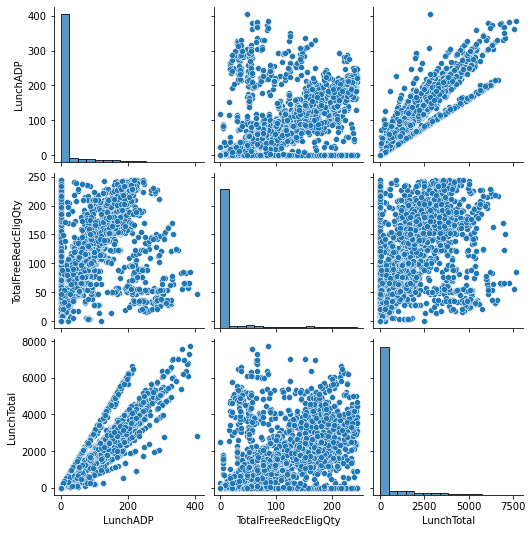

In [12]:
#creating pair plot using all variables of interest
pair_plot = sns.pairplot(corr_df)

## 5. Hypothesis

If more students at a school are eligble for free or reduced price lunch, then that school will have a higher rate of students who opt into receiving the school's meals. 

## 4. Data prep for regression

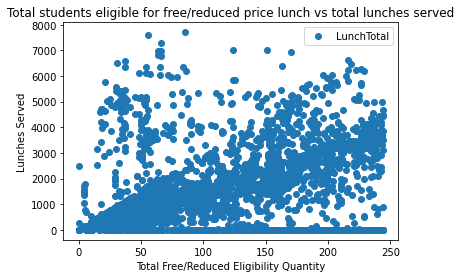

In [13]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_NoOutliers.plot(x = 'TotalFreeRedcEligQty', y='LunchTotal',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total students eligible for free/reduced price lunch vs total lunches served')  
plt.xlabel('Total Free/Reduced Eligibility Quantity')  
plt.ylabel('Lunches Served')  
plt.show()

In [14]:
# Reshaping the variables into NumPy arrays and putting them into separate objects

X = df_NoOutliers['TotalFreeRedcEligQty'].values.reshape(-1,1)
y = df_NoOutliers['LunchTotal'].values.reshape(-1,1)

In [15]:
X

array([[201],
       [191],
       [192],
       ...,
       [151],
       [  0],
       [ 65]], dtype=int64)

In [16]:
y

array([[2480],
       [1365],
       [1399],
       ...,
       [1658],
       [   0],
       [ 981]], dtype=int64)

In [17]:
# Splitting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [18]:
# creatinga regression object
regression = LinearRegression()

In [19]:
# fitting the regression object to the training data 
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predicting the values of y using X
y_predicted = regression.predict(X_test)

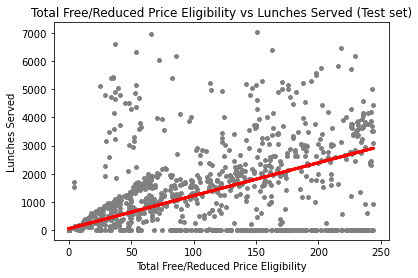

In [21]:
# creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Free/Reduced Price Eligibility vs Lunches Served (Test set)')
plot_test.xlabel('Total Free/Reduced Price Eligibility')
plot_test.ylabel('Lunches Served')
plot_test.show()

The line seems to fit the data pretty well. There many values above and below it, but the data does seem to follow a generally positive trend. 

In [22]:
#save figure
plt.savefig('Regression Model')

<Figure size 432x288 with 0 Axes>

In [23]:
# Creating objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [24]:
# Printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[11.71054935]]
Mean squared error:  421705.1324715547
R2 score:  0.4191748033995766


In [25]:
# Comparing the predicted y values with the actual y values in a dataframe
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,47.085885
1,6390,1955.905430
2,0,47.085885
3,0,47.085885
4,0,47.085885
5,0,47.085885
6,3890,2881.038829
7,0,47.085885
8,0,47.085885
9,0,47.085885


The model did not perform very well. The mean squared error (421705) is very large and the R2 score does not indicate a good fit. There is also a large difference between the actual and predicted y values. All of this shows that a regression may not be the best model to represent this data and can’t accurately predict the influence of the total number of students eligible for free/reduced priced lunch on the total number of lunches served in a site.  